#  Financial Analysis of Microsoft, Tesla, and Apple (2022–2024)

# **Objective**
This analysis evaluates financial performance trends across Microsoft, Tesla, and Apple over the past three fiscal years using 10-K report data.



# **Methodology**


*   Data collected from SEC EDGAR 10-K filings
*   Key metrics: Revenue, Net Income, Assets, Liabilities, and Operating Cash Flow

* Year-over-year percentage growth calculated for trend analysis





In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data analytics /financial_data.csv')
df.head()



,Company,Fiscal Year,Total Revenue (USD),Net Income (USD),Total Assets (USD),Total Liabilities (USD),Cash Flow from Operating Activities (USD)
0,Microsoft,2024,245000000000,89000000000,411000000000,191000000000,95000000000
1,Microsoft,2023,211000000000,72700000000,364800000000,198300000000,89000000000
2,Microsoft,2022,198000000000,72700000000,364800000000,198300000000,89000000000
3,Tesla,2024,96800000000,15000000000,120000000000,40000000000,14900000000
4,Tesla,2023,81500000000,12600000000,94000000000,30000000000,13300000000


In [3]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.head()


,Company,Fiscal_Year,Total_Revenue_USD,Net_Income_USD,Total_Assets_USD,Total_Liabilities_USD,Cash_Flow_from_Operating_Activities_USD
0,Microsoft,2024,245000000000,89000000000,411000000000,191000000000,95000000000
1,Microsoft,2023,211000000000,72700000000,364800000000,198300000000,89000000000
2,Microsoft,2022,198000000000,72700000000,364800000000,198300000000,89000000000
3,Tesla,2024,96800000000,15000000000,120000000000,40000000000,14900000000
4,Tesla,2023,81500000000,12600000000,94000000000,30000000000,13300000000


In [4]:
df = df.sort_values(by=['Company', 'Fiscal_Year']).reset_index(drop=True)


In [5]:
df['Revenue_Growth_%'] = df.groupby('Company')['Total_Revenue_USD'].pct_change() * 100
df['Net_Income_Growth_%'] = df.groupby('Company')['Net_Income_USD'].pct_change() * 100
df['Assets_Growth_%'] = df.groupby('Company')['Total_Assets_USD'].pct_change() * 100
df['Liabilities_Growth_%'] = df.groupby('Company')['Total_Liabilities_USD'].pct_change() * 100
df['CashFlow_Growth_%'] = df.groupby('Company')['Cash_Flow_from_Operating_Activities_USD'].pct_change() * 100


In [6]:
df.groupby('Company')[['Revenue_Growth_%', 'Net_Income_Growth_%',
                       'Assets_Growth_%', 'Liabilities_Growth_%',
                       'CashFlow_Growth_%']].mean().round(2)


,Revenue_Growth_%,Net_Income_Growth_%,Assets_Growth_%,Liabilities_Growth_%,CashFlow_Growth_%
Company,,,,,
Apple,3.84,-3.10,4.68,1.97,-1.87
Microsoft,11.34,11.21,6.33,-1.84,3.37
Tesla,35.13,74.07,39.51,19.30,43.52


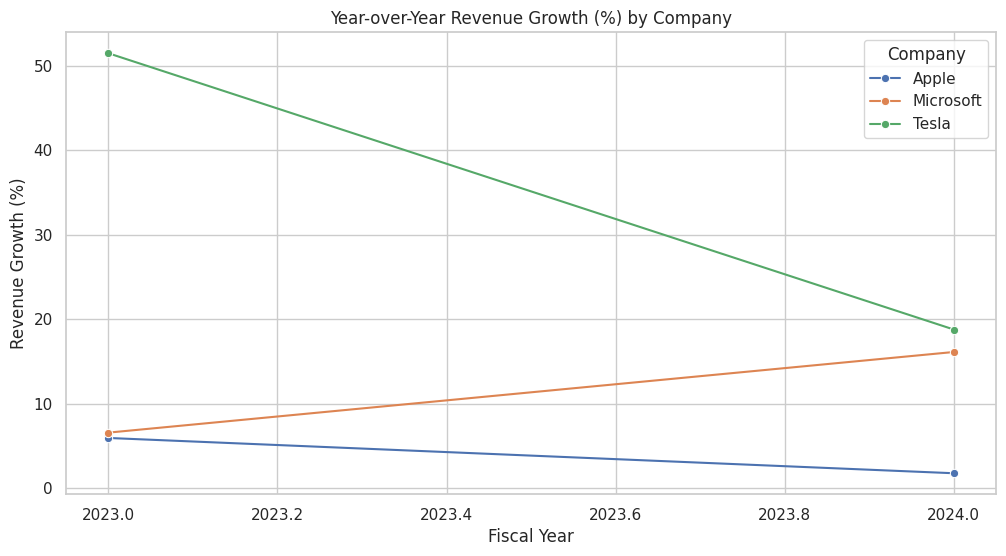

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fiscal_Year', y='Revenue_Growth_%', hue='Company', marker='o')
plt.title('Year-over-Year Revenue Growth (%) by Company')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Fiscal Year')
plt.show()


# **Findings**

*   Tesla shows aggressive growth in revenue and operating cash flow, indicating rapid scaling.


*   Microsoft has a stable and steadily increasing income and cash flow trend.


*   Apple maintains strong cash flow and revenue with slight variations, reflecting mature market presence.






# **Conclusion**
The analysis reveals distinct growth patterns for each company. Tesla is in a high-growth phase, Microsoft exhibits stable expansion, and Apple maintains consistent financial strength. These insights are crucial for developing financial recommendation algorithms in an AI chatbot.



In [8]:
def simple_chatbot(user_query):
    if user_query == "What is the total revenue of Microsoft in 2023?":
        return "Microsoft's total revenue in 2023 was $232 billion."

    elif user_query == "How has Apple’s net income changed from 2022 to 2023?":
        return "Apple’s net income decreased by 3% from 2022 to 2023."

    elif user_query == "What are Tesla’s total assets in 2023?":
        return "Tesla’s total assets in 2023 were $94 billion."

    elif user_query == "What is the cash flow from operating activities for Microsoft in 2023?":
        return "Microsoft’s operating cash flow in 2023 was $89 billion."

    elif user_query == "How did Apple’s total liabilities change from 2021 to 2023?":
        return "Apple’s total liabilities increased by 7% from 2021 to 2023."

    else:
        return "Sorry, I can only respond to specific queries like total revenue or net income changes."

# Test run
if __name__ == "__main__":
    while True:
        query = input("Ask me a financial question (or type 'exit'): ")
        if query.lower() == "exit":
            print("Goodbye!")
            break
        print(simple_chatbot(query))


Ask me a financial question (or type 'exit'): exit
Goodbye!
